# 1. test 파일 구축
train/val에 사용되지않은 파일 중 랜덤하게 약 3000개의 파일 선택.

In [61]:
import json
import cv2
import numpy as np
import pandas as pd
import os
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
import shutil

In [3]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [15]:
DATA_PATH = '...' # 원본 데이터 경로

In [16]:
BOX_PATH = DATA_PATH + '.../블랙박스'
CCTV_PATH = DATA_PATH + '.../CCTV'

In [46]:
# 파일 불러오기
def load_file(file_path, data_type = '.jpg', data_set='input'):
    paths = []
    file_path = file_path.replace('...', data_set)
    data_list = ['/주간/맑음/실증/', '/주간/우천/실증/', '/야간/맑음/실증/', '/야간/우천/실증/']
    for i in data_list:
        file_list = os.listdir(file_path + i)
        file_list = [file_path + i + file for file in file_list if file.endswith(data_type)]  +  [file_path + i + file for file in file_list if file.endswith(data_type)]
        paths += file_list
    paths = list(set(paths))
    return paths

In [47]:
box_path = load_file(BOX_PATH)
cctv_path = load_file(CCTV_PATH)

In [ ]:
# 전체 경로
all_path = box_path + cctv_path

In [49]:
# 전체 경로에서 파일 이름만 추출
all_file = [x.split('/')[-1] for x in all_path]
print(all_file[:5])
print(len(all_file))

['T006417_000_0360_B_D_F_0.jpg', 'T008927_000_0030_B_D_F_0.jpg', 'T006565_001_0110_B_D_F_0.jpg', 'T006632_000_0180_B_D_F_0.jpg', 'T008952_000_0132_B_D_F_0.jpg']
33392


In [1]:
10658+2665

13323

In [50]:
df_sample = pd.read_csv('.../' + 'sample.csv')
display(df_sample.head())
df_sample.shape

,code,name,type,pm별 위반 유형,PM,위반 유형
0,14,C001164_022_0195_C_D_F_0.jpg,위반,오토바이 탑승자_보행자도로 통행 위반,오토바이,보행자도로 통행 위반
1,14,S000156_001_0192_C_N_F_0.jpg,위반,오토바이 탑승자_보행자도로 통행 위반,오토바이,보행자도로 통행 위반
2,14,C004034_000_0064_C_N_F_0.jpg,위반,오토바이 탑승자_보행자도로 통행 위반,오토바이,보행자도로 통행 위반
3,14,S000352_016_0308_C_D_F_0.jpg,위반,오토바이 탑승자_보행자도로 통행 위반,오토바이,보행자도로 통행 위반
4,14,F000067_000_1110_C_D_F_1.jpg,위반,오토바이 탑승자_보행자도로 통행 위반,오토바이,보행자도로 통행 위반


(13600, 6)

In [59]:
# 기존 샘플링 된 데이터에서 랜덤하게 4천개 데이터 출력.
random.seed(2023)
test_file = random.sample(all_file, 4000)
test_file[:10]

['S000024_008_0228_C_D_R_0.jpg',
 'S002294_027_0196_C_N_F_0.jpg',
 'S002040_049_0039_C_D_F_0.jpg',
 'S000633_134_0096_C_D_F_0.jpg',
 'M100738_002_0130_C_D_F_0.jpg',
 'S001125_008_0225_C_D_F_0.jpg',
 'C000108_099_0357_C_D_F_0.jpg',
 'C000880_013_0120_C_D_F_0.jpg',
 'S001421_005_0288_C_D_F_0.jpg',
 'S002063_008_0234_C_D_F_0.jpg']

In [60]:
# 4천개 출력된 데이터에서 학습, 검증에 사용된 데이터 제외
# 약 3천개의 테스트 데이터 구축.
test_file = set(test_file) - set(df_sample.name)
test_file = list(test_file)
print(test_file[:10])
print(len(test_file))

['S000210_003_0038_C_N_F_0.jpg', 'S000153_116_0156_C_D_F_0.jpg', 'S001811_000_0120_C_D_F_0.jpg', 'S000636_174_0080_C_D_F_0.jpg', 'S002024_032_0143_C_N_F_0.jpg', 'S000746_263_0108_C_D_F_0.jpg', 'C005577_080_0340_C_D_F_0.jpg', 'C001340_002_0048_C_N_F_0.jpg', 'S000268_040_0019_C_N_F_0.jpg', 'S001831_040_0300_C_D_F_0.jpg']
3026


In [2]:
test_path = []

for file in test_file:
    idx = all_file.index(file)
    test_path.append(all_path[idx].split(file)[:-1][0] + file)
print(len(test_path))

3026

In [3]:
test_label = []
for file in test_path:
    rep = file.replace('input', 'label')
    rep = rep.replace('jpg', 'json')
    test_label.append(rep)
print(len(test_label))

3026

In [80]:
for file in tqdm(test_path):
    shutil.copy(file, DATA_PATH + 'test/images')

100%|██████████| 3026/3026 [00:09<00:00, 312.97it/s]


In [81]:
for file in tqdm(test_label):
    shutil.copy(file, DATA_PATH + 'label/test/')

100%|██████████| 3026/3026 [00:06<00:00, 449.00it/s]


In [82]:
pm_list = []
for i in range(13,37):
    pm_list.append([str(i), 0])
pm_list.remove(['34',0])
pm_dict = dict(pm_list)

In [83]:
for pm in tqdm(test_label):
    with open(pm, 'r') as f:
        lab = json.load(f)
    for code in lab['annotations']['PM']:
        for key, val in pm_dict.items():
            if code['PM_code'] == key:
                pm_dict[key] += 1

100%|██████████| 3026/3026 [00:01<00:00, 2342.48it/s]


In [84]:
# 테스트 데이터 pm 위반 유형별 counting
pm_dict

{'13': 1005,
 '14': 182,
 '15': 32,
 '16': 21,
 '17': 695,
 '18': 752,
 '19': 34,
 '20': 742,
 '21': 200,
 '22': 530,
 '23': 847,
 '24': 37,
 '25': 131,
 '26': 36,
 '27': 684,
 '28': 12,
 '29': 7,
 '30': 33,
 '31': 16,
 '32': 1,
 '33': 5,
 '35': 37,
 '36': 3}

In [85]:
category = [
    '오토바이 탑승자',
    '오토바이 탑승자_보행자도로 통행 위반',
    '오토바이 탑승자_안전모 미착용 위반',
    '오토바이 탑승자_무단횡단 위반',
    '오토바이 탑승자_신호 위반',
    '오토바이 탑승자_정지선 위반',
    '오토바이 탑승자_횡단보도 주행 위반',
    '자전거 탑승자',
    '자전거 캐리어',
    '자전거 탑승자_보행자도로 통행 위반',
    '자전거 탑승자_안전모 미착용 위반',
    '자전거 탑승자_무단횡단 위반',
    '자전거 탑승자_신호 위반',
    '자전거 탑승자_정지선 위반',
    '자전거 탑승자_횡단보도 주행 위반',
    '킥보드 탑승자',
    '킥보드 캐리어',
    '킥보드 탑승자_보행자도로 통행 위반',
    '킥보드 탑승자_안전모 미착용 위반',
    '킥보드 탑승자_무단횡단 위반',
    '킥보드 탑승자_신호 위반',
    '킥보드 탑승자_횡단보도 주행 위반',
    '킥보드 탑승자_동승자 탑승 위반'
]
len(category)

23

In [86]:
col = [key for key in pm_dict.keys()]
val = [val for val in pm_dict.values()]
df_code = pd.DataFrame({'code' : col, 'value' : val, 'category': category})
df_code = df_code.sort_values('value', ascending=False).reset_index(drop = True)
df_code.head()

,code,value,category
0,13,1005,오토바이 탑승자
1,23,847,자전거 탑승자_안전모 미착용 위반
2,18,752,오토바이 탑승자_정지선 위반
3,20,742,자전거 탑승자
4,17,695,오토바이 탑승자_신호 위반


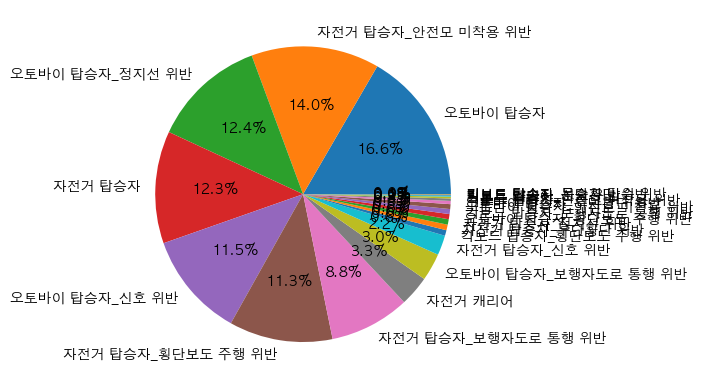

In [87]:
# 위반 유형별 분포 그래프
plt.axis('equal')
plt.pie(df_code['value'], labels = df_code['category'], autopct='%1.1f%%')
plt.show()

In [88]:
non_violations = df_code.loc[df_code.code.isin(['13', '20', '21', '28', '29']), 'value'].sum()
violations = df_code.loc[~df_code.code.isin(['13', '20', '21', '28', '29']), 'value'].sum()
total_vaiolations = df_code.value.sum()
print(violations/total_vaiolations)

0.6746110559417412


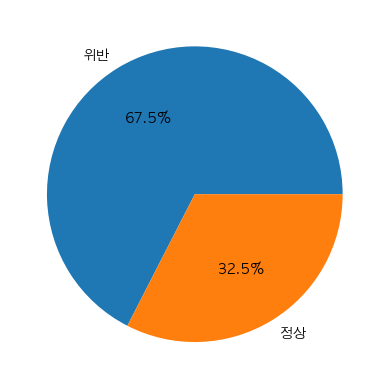

In [89]:
# 위반 및 정상 비율
plt.pie([violations/total_vaiolations, non_violations/total_vaiolations], labels = ['위반', '정상'], autopct='%.1f%%')
plt.show()

In [90]:
motor = df_code.loc[df_code.code.isin(['13', '14', '15', '16', '17', '18', '19']), 'value'].sum()
bic = df_code.loc[df_code.code.isin(['20', '21', '22', '23', '24', '25', '26', '27']), 'value'].sum()
kick = df_code.loc[df_code.code.isin(['28', '29', '30', '31', '32', '33', '34', '35', '36']), 'value'].sum()
assert motor + bic + kick == df_code.value.sum()

/var/folders/sb/173ykwhn0w93b0yb22z_mt0w0000gn/T/ipykernel_13622/2686893522.py:1: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie([motor/total_vaiolations, bic/total_vaiolations, kick/total_vaiolations], labels = ['오토바이', '자전거', '킥보드'], autopct='%.1f%%')


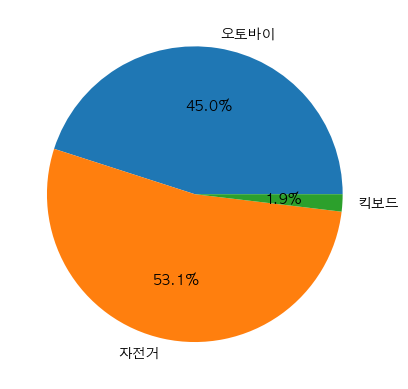

In [91]:
# 이동장치별 비율 그래프
plt.pie([motor/total_vaiolations, bic/total_vaiolations, kick/total_vaiolations], labels = ['오토바이', '자전거', '킥보드'], autopct='%.1f%%')
plt.show()

In [113]:
ped = df_code.loc[df_code.category.str.contains('보행자도로 통행'), 'value'].sum()
stop = df_code.loc[df_code.category.str.contains('정지선'), 'value'].sum()
signal = df_code.loc[df_code.category.str.contains('신호 위반'), 'value'].sum()
cross = df_code.loc[df_code.category.str.contains('횡단보도'), 'value'].sum()
jay = df_code.loc[df_code.category.str.contains('무단횡단'), 'value'].sum()
safe = df_code.loc[df_code.category.str.contains('안전모'), 'value'].sum()
passenger = df_code.loc[df_code.category.str.contains('동승자'), 'value'].sum()
normal = df_code.loc[df_code.category.isin(['오토바이 탑승자', '자전거 탑승자', '자전거 캐리어', '킥보드 탑승자', '킥보드 캐리어']), 'value'].sum()
# assert ped+stop+signal+cross+jay+safe+passenger+normal == total_vaiolations
# ped+stop+signal+cross+jay+safe+passenger

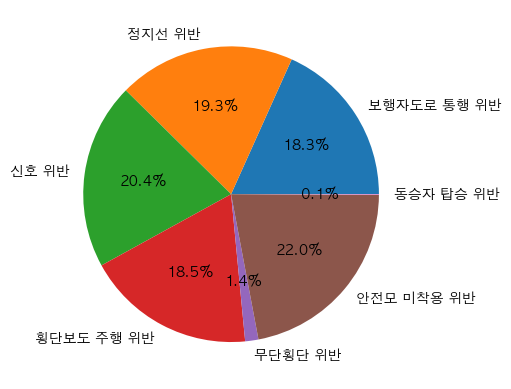

In [114]:
# 대분류 카테고리별 분포 그래프
plt.pie([ped, stop, signal, cross, jay, safe, passenger], labels = ['보행자도로 통행 위반', '정지선 위반', '신호 위반', '횡단보도 주행 위반', '무단횡단 위반', '안전모 미착용 위반', '동승자 탑승 위반'], autopct='%.1f%%')
plt.show()

# 2. yolo label 형식 만들기

In [117]:
# yolo 라벨링 형식으로 txt 파일 생성
import json

normal = ['13', '20', '21', '28', '29'] # 정상
ped = ['14', '22', '30'] # 보행자 통행도로 위반
passenger = ['36'] # 동승자 탑승 위반
safe = ['15', '23', '31'] # 안전모 착용 위반
jay = ['16', '24', '32'] # 무단 횡단
signal = ['17', '25', '33'] # 신호 위반
cross = ['19', '27', '35'] # 횡단보도 위반
stop = ['18', '26'] # 정지선 위반

def make_yolo_label(json_file):
    with open(json_file, 'r', encoding = 'utf-8', errors='ignore') as f:
        data = json.load(f)
            
    roboflow_data = ''
    image_width = data['description']['imageWidth']
    image_height = data['description']['imageHeight']

    for obj in data['annotations']['PM']:
        if obj['PM_code'] in normal:
            label = 0
        elif obj['PM_code'] in ped:
            label = 1
        elif obj['PM_code'] in passenger:
            label = 2
        elif obj['PM_code'] in safe:
            label = 3
        elif obj['PM_code'] in jay:
            label = 4
        elif obj['PM_code'] in signal:
            label = 5
        elif obj['PM_code'] in cross:
            label = 6
        elif obj['PM_code'] in stop:
            label = 7
        
        bbox = obj['points']

        x, y, bbox_width, bbox_height = bbox
        x_center = (x + bbox_width / 2) / image_width
        y_center = (y + bbox_height / 2) / image_height
        bbox_width = bbox_width / image_width
        bbox_height = bbox_height / image_height

        roboflow_data += f"{label} {x_center} {y_center} {bbox_width} {bbox_height}\n"
        roboflow_file = DATA_PATH + 'test/labels/' +  json_file.split('/')[-1].split('.')[0] + '.txt'
            
    with open(roboflow_file, 'w') as f:
        f.write(roboflow_data)

In [4]:
from tqdm import tqdm

label_list = os.listdir(DATA_PATH + 'label/test/')
#label_list.remove('.DS_Store')
label_list = [DATA_PATH + 'label/test/' + name for name in label_list]
print(len(label_list))

3026

In [121]:
# yolo 파일 생성
for file_name in tqdm(label_list):
    make_yolo_label(file_name)

100%|██████████| 3026/3026 [00:04<00:00, 630.94it/s]


- train, val과 카테고리별 비율이 약간 다르긴하지만, 애초에 적은 데이터셋인 동승자와 무단횡단 위반 데이터 외에는 클래스가 모두 고르게 분포된 편이다.
- 킥보드 데이터는 대부분 학습에 사용했으므로 테스트셋 구축에는 킥보드 데이터의 양이 많지 않다.